# Importing library pandas

In [1]:
import pandas as pd

# Reading the table transactional-sample

In [29]:
table_transactional_sample = pd.read_csv('transactional-sample.csv')
display(table_transactional_sample)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01T13:05:34.054967,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,2019-11-01T11:47:02.404963,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,2019-11-01T10:23:50.555604,1.55,NaN,False
3197,21323595,35930,7,544315******7773,2019-11-01T01:29:45.799767,359.68,NaN,False


In [103]:
print(f'Number of entries: {table_transactional_sample.shape[0]}')
print(f'Number of variables: {table_transactional_sample.shape[1]}')

Number of entries: 3199
Number of variables: 8


In [99]:
display(table_transactional_sample.describe())

,transaction_id,merchant_id,user_id,transaction_amount,device_id
count,3.199000e+03,3199.000000,3199.000000,3199.000000,2369.000000
mean,2.132200e+07,48771.128790,50891.077212,767.812904,493924.859856
std,9.236161e+02,29100.360839,29515.282827,889.095904,283785.584545
min,2.132040e+07,16.000000,6.000000,1.220000,2.000000
25%,2.132120e+07,23426.000000,24267.500000,205.235000,259344.000000
50%,2.132200e+07,48752.000000,52307.000000,415.940000,495443.000000
75%,2.132280e+07,73915.000000,76837.000000,981.680000,733243.000000
max,2.132360e+07,99799.000000,99974.000000,4097.210000,999843.000000


In [100]:
unique_users = table_transactional_sample["user_id"].nunique()
print(f'Number of users: {unique_users}')

Number of users: 2704


In [102]:
unique_merchants = table_transactional_sample["merchant_id"].nunique()
print(f'Number of merchants: {unique_merchants}')

Number of merchants: 1756


# Max, min and mean of amount

#### MAXIMUM

In [3]:
max_device = table_transactional_sample["transaction_amount"].max()
print(max_device)

4097.21


#### MINIMUM

In [4]:
min_device = table_transactional_sample["transaction_amount"].min()
print(min_device)

1.22


#### MEAN 

In [5]:
mean_device = table_transactional_sample["transaction_amount"].mean()
print(round(mean_device, 2))

767.81


# Transactions that have chargebank 

In [6]:
table_transactional_sample["has_cbk"].value_counts()

False    2808
True      391
Name: has_cbk, dtype: int64

In [7]:
table_transactional_sample["has_cbk"].value_counts(normalize = True)

False    0.877774
True     0.122226
Name: has_cbk, dtype: float64

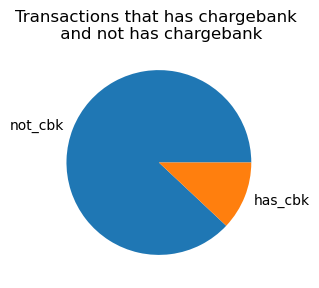

In [27]:
from matplotlib import pyplot as plt
  
incidence_cbk = ['not_cbk', 'has_cbk'] 
  
count_cbk = [87.8, 12.2] 
fig = plt.figure(figsize =(5, 3))
plt.title('Transactions that have chargeback \n and not have chargeback')
plt.pie(count_cbk, labels = incidence_cbk)
plt.show()

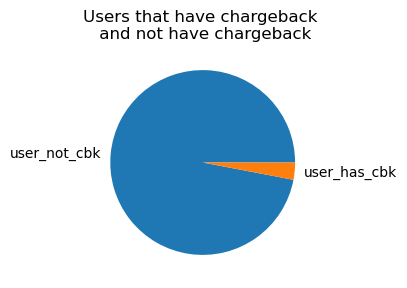

In [118]:
incidence_cbk = ['user_not_cbk', 'user_has_cbk'] 
  
count_cbk = [97, 3] 
fig = plt.figure(figsize =(5, 3))
plt.title('Users that have chargeback \n and not have chargeback')
plt.pie(count_cbk, labels = incidence_cbk)
plt.show()

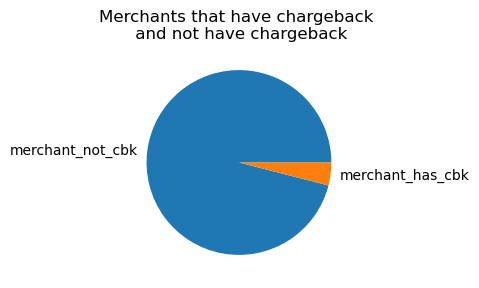

In [115]:
incidence_cbk = ['merchant_not_cbk', 'merchant_has_cbk'] 
  
count_cbk = [96, 4]
fig = plt.figure(figsize =(5, 3))
plt.title('Merchants that have chargeback \n and not have chargeback')
plt.pie(count_cbk, labels = incidence_cbk)
plt.show()

# Importing the table has_cbk

In [9]:
table_has_cbk = pd.read_csv('has_cbk.csv')
display(table_has_cbk)

,id,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,2,21320399,92895,2708,444456******4210,2019-12-01 22:45:38,734.87,497105.0,True
1,4,21320401,68657,69758,464296******3991,2019-12-01 21:59:20,2556.13,NaN,True
2,8,21320405,56107,81152,650516******9201,2019-12-01 21:24:06,188.68,486.0,True
3,9,21320406,56107,81152,650516******9201,2019-12-01 21:13:22,352.77,486.0,True
4,10,21320407,56107,81152,650516******9201,2019-12-01 21:04:55,345.68,486.0,True
...,...,...,...,...,...,...,...,...,...
386,3158,21323555,41354,19820,606282******6581,2019-11-02 18:04:22,4028.55,NaN,True
387,3166,21323563,41354,19820,606282******6581,2019-11-02 16:33:21,4031.00,NaN,True
388,3179,21323576,16266,96495,522840******2045,2019-11-01 22:10:50,762.18,NaN,True
389,3181,21323578,16266,96495,552305******4782,2019-11-01 20:54:04,2936.66,NaN,True


In [116]:
count_internet = 0

for line in table_has_cbk['transaction_amount']:
    if line > 767:
        count_internet += 1
print(f" Number of transactions with \n above-average price: {count_internet}")

 Number of transactions with 
 above-average price: 234


# Importing the table user_has_cbk

In [14]:
table_user_has_cbk = pd.read_csv('user_has_cbk.csv')
display(table_user_has_cbk)

,has_cbk,user_id,count_user
0,True,11750,25
1,True,91637,19
2,True,79054,15
3,True,96025,13
4,True,78262,12
...,...,...,...
73,True,75889,2
74,True,47604,2
75,True,90176,2
76,True,26251,2


#  Importing the table merchant_has_cbk

In [17]:
table_merchant_has_cbk = pd.read_csv('merchant_has_cbk.csv')
display(table_merchant_has_cbk)

,has_cbk,merchant_id,count_merchant
0,True,17275,22
1,True,4705,19
2,True,1308,15
3,True,53041,14
4,True,77130,13
...,...,...,...
61,True,77570,2
62,True,23722,2
63,True,5533,2
64,True,67764,2


# Internet transactions with chargeback

In [37]:
table_internet_transactions = pd.read_csv('internet_transaction.csv')
display(table_internet_transactions)

,id,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,4,21320401,68657,69758,464296******3991,2019-12-01 21:59:20,2556.13,NaN,True
1,33,21320430,56977,69758,464296******3991,2019-12-01 19:17:22,2803.32,NaN,True
2,135,21320532,72723,26251,530034******4649,2019-12-01 03:35:18,695.36,NaN,True
3,136,21320533,72723,26251,530034******4649,2019-12-01 03:20:10,991.37,NaN,True
4,172,21320569,11570,43018,550209******5242,2019-11-30 21:59:49,79.85,NaN,True
...,...,...,...,...,...,...,...,...,...
62,3158,21323555,41354,19820,606282******6581,2019-11-02 18:04:22,4028.55,NaN,True
63,3166,21323563,41354,19820,606282******6581,2019-11-02 16:33:21,4031.00,NaN,True
64,3179,21323576,16266,96495,522840******2045,2019-11-01 22:10:50,762.18,NaN,True
65,3181,21323578,16266,96495,552305******4782,2019-11-01 20:54:04,2936.66,NaN,True


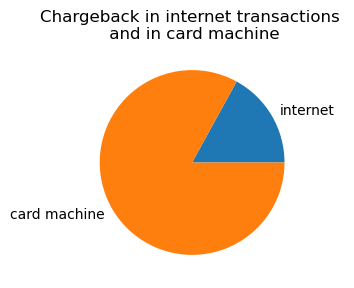

In [81]:
incidence_internet_cbk = ['internet', 'card machine'] 
  
count_cbk = [17, 83]
fig = plt.figure(figsize =(5, 3))
plt.title('Chargeback in internet transactions \n and in card machine')
plt.pie(count_cbk, labels = incidence_internet_cbk)
plt.show()

count_card: 74.05%
count_internet: 25.95%




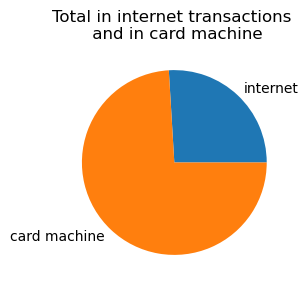

In [119]:
import numpy


count_internet = 0
count_card = 0

for line in table_transactional_sample['device_id']:
    if numpy.isnan(line):
        count_internet += 1
    else:
        count_card += 1
        
count_card = (100 * count_card) / 3199
count_internet = (100 * count_internet) / 3199

card_percentage = round(count_card, 2)
internet_percentage = round(count_internet, 2)

print("count_card: " + str(card_percentage) + "%")
print("count_internet: " + str(internet_percentage) + "%" + "\n" + "\n")

incidence_cbk = ['internet', 'card machine'] 
  
count_cbk = [internet_percentage, card_percentage]
fig = plt.figure(figsize =(5, 3))
plt.title('Total in internet transactions \n and in card machine')
plt.pie(count_cbk, labels = incidence_cbk)
plt.show()